In [1]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/8%20Colonia%20de%20Abejas%20Artificial/C%C3%B3digos/Plot_Contour.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/8%20Colonia%20de%20Abejas%20Artificial/C%C3%B3digos/Plot_Surf.py'

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

--2023-10-20 03:20:57--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/8%20Colonia%20de%20Abejas%20Artificial/C%C3%B3digos/Plot_Contour.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649 [text/plain]
Saving to: ‘Plot_Contour.py’

Plot_Contour.py     100%[===================>]     649  --.-KB/s    in 0s      

2023-10-20 03:20:57 (27.5 MB/s) - ‘Plot_Contour.py’ saved [649/649]

--2023-10-20 03:20:57--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/8%20Colonia%20de%20Abejas%20Artificial/C%C3%B3digos/Plot_Surf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP 

Selección

In [5]:
def Seleccion(aptitud):
    Idx = np.argsort(aptitud)
    Idx = Idx[::-1]
    N = (aptitud.size)

    rank = np.arange(N,-1,-1)
    rank_total = np.sum(rank)

    r = np.random.rand()
    p_sum = 0

    for i in range(N):
        p_sum = p_sum + rank[i] / rank_total

        if p_sum >= r:
            n = Idx[i]
            return n

    n = Idx[N]
    return n

Función objetivo

In [24]:
#f = lambda x, y: (x-2)**2 + (y-2)**2
#f = lambda x, y: -20 * np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))) + 20 + np.exp(1)
#f = lambda x, y: -((1+np.cos(12*np.sqrt(x**2+y**2))) / (0.5*(x**2+y**2)+2))
#f = lambda x, y: 10*2 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)
#f = lambda x, y: ((x**2/4000)+(y**2/4000))-(np.cos(x)*np.cos(y/np.sqrt(2)))+1
#f = lambda x, y: np.sin(x+y) + (x-y) ** 2 - 1.5 * x + 2.5 * y+1 # McCormick Function
f = lambda x, y: (x**2)+(y**2) #Sphere

Parámetros

In [25]:
xl = np.array([-5, -5])
xu = np.array([5, 5])

#xl = np.array([-1.5, -3])
#xu = np.array([4, 4])

D = 2
G = 150

N = 50
L = 15

Pf = 30
Po = N - Pf

x = np.zeros((D,Pf))
l = np.zeros(Pf)
aptitud = np.zeros(Pf)
fitness = np.zeros(Pf)

for i in range(Pf):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

# ABC

Mínimo global en x= 5.1290034432853515e-14  y= -5.8783651419657524e-15  f(x,y)= 2.6652228088655775e-27


<Figure size 640x480 with 0 Axes>

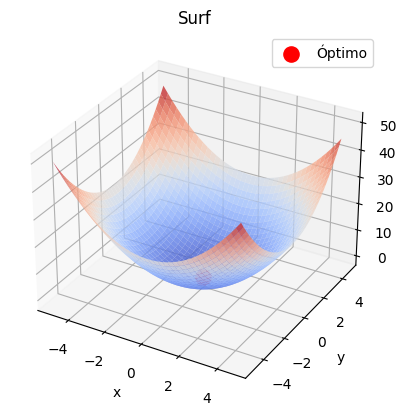

In [26]:
for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # Abejas empleadas:
    for i in range(Pf):
        k = i
        while k == i:
            k = np.random.randint(Pf)

        j = np.random.randint(D)
        phi = 2 * np.random.rand() - 1

        v = x[:, i].copy()
        v[j] = x[j, i] + phi * (x[j, i] - x[j, k])

        fv = f(v[0], v[1])

        if fv < fitness[i]:
            x[:, i] = v
            fitness[i] = fv
            l[i] = 0
        else:
            l[i] = l[i] + 1

        if fitness[i] >= 0:
            aptitud[i] = 1/(1 + fitness[i])
        else:
            aptitud[i] = 1 + np.abs(fitness[i])

    for i in range(Po):
        m = Seleccion(aptitud)

        k = m
        while k == m:
            k = np.random.randint(Pf)

        j = np.random.randint(D)
        phi = 2 * np.random.rand() - 1

        v = x[:, m].copy()
        v[j] = x[j, m] + phi * (x[j, m] - x[j, k])

        fv = f(v[0], v[1])

        if fv < fitness[m]:
            x[:, m] = v
            fitness[m] = fv

            l[m] = 0
        else:
            l[m] = l[m] + 1

    # Abejas exploradoras
    for i in range(Pf):
        if l[i] > L:
            x[:, i] = xl + (xu - xl) * np.random.rand(D)
            fitness[i] = f(x[0, i], x[1, i])
            l[i] = 0


igb = np.argmin(fitness)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", fitness[igb])
plot_surf(f, x, xl, xu, igb)